# Seatel, WA Weather prediction with Random Forest method

Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt


## Import Data

### Data Desciption

| Column   | Description                                           |
|----------|-------------------------------------------------------|
| year     | 2016 for all data points                              |
| month    | Month of the year as a number (1-12)                  |
| day      | Day of the year as a number (1-31)                    |
| week     | Day of the week as a character string (e.g., "Monday")|
| temp_2   | Max temperature 2 days prior                          |
| temp_1   | Max temperature 1 day prior                           |
| average  | Historical average max temperature                    |
| actual   | Max temperature measurement                           |
| friend   | Friend’s prediction, a random number between 20 below and 20 above the average |



In [2]:
df = pd.read_csv('temps.csv')


df.drop(columns=['forecast_acc', 'forecast_noaa', 'forecast_under'], axis=1, inplace=True)
df.head()


,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


### Verify dataset for missing value
- Another way to check for missing value in dataset is `df.notnull().sum()` ==> It returns the number of NotNull value in each column

In [3]:
# summary of data frame
df.info()
print(f'The shape of the dataframe is : {df.shape}')

# check dataframe for existence of null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB
The shape of the dataframe is : (348, 9)


year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

## Detect Anomalies

### What is Anomaly?
- Data point or pattern that significantly deviates from the expected or normal behavior. e.g. outliers

### Type of Anomalies
#### Point Anomalies
- A single data point that is significantly different from the rest of the data. e.g. temperature 100 centigrade

#### Contextual Anomalies
- Data points that are considered normal in one context but abnormal in another. For example, a high temperature might be normal in summer but an anomaly in winter.

#### Collective Anomalies
- A group of data points that, when considered together, form an anomaly, even though individual points might appear normal. For instance, a sudden, consistent rise in temperature readings over a short period might indicate an equipment malfunction.

In [4]:
# Describe statistic of each column
df.describe()


,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


### Anomaly is detected
- temp_1 and temp_2 max values are out of range for temperature and too higher than 75% and detected as anomaly
- In actual and friend columns max value is too high and should be considered as anomaly.

### next step
- Use visual plot like box plot to verify outliers

## Visual Plot for verifying  outliers

### Box Plot to identify outliers

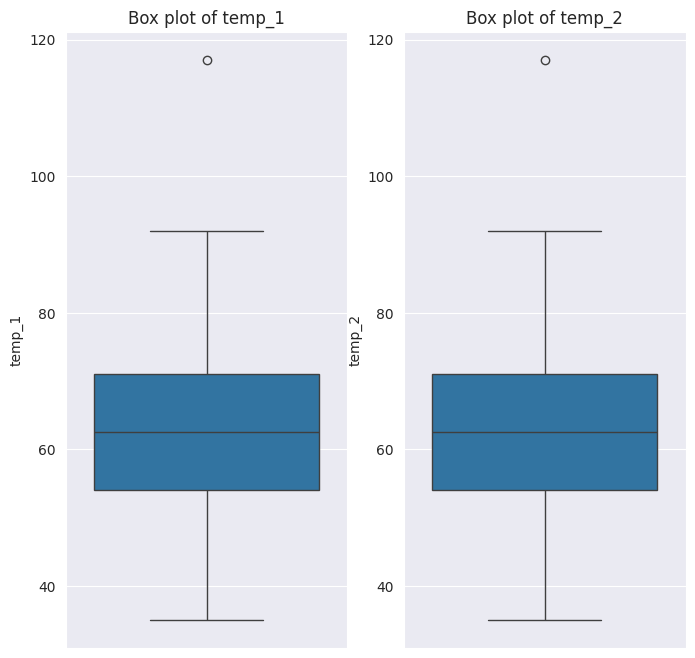

In [5]:
# create figure with one row and 2 columns 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

# detect outlier in temp_1
sns.boxplot(y=df['temp_1'], ax=ax1)
ax1.set_title('Box plot of temp_1')

# detect outliers in temp_2
sns.boxplot(y=df['temp_2'], ax=ax2)
ax2.set_title('Box plot of temp_2')


plt.show()

Remove outliers

In [35]:
# Print the outliers
print(df.loc[df['temp_1'] == 117])
print(df.loc[df['temp_2'] == 117])

# Select Outliers to drop
temp1_indices_to_drop = df.index[df['temp_1']==117]
temp2_indices_to_drop = df.index[df['temp_2'] == 117]

# Drop outliers
df = df.drop(temp1_indices_to_drop)
df = df.drop(temp2_indices_to_drop)

# Check shape of the dataframe
df.shape


Empty DataFrame
Columns: [year, month, day, week, temp_2, temp_1, average, actual, friend]
Index: []
Empty DataFrame
Columns: [year, month, day, week, temp_2, temp_1, average, actual, friend]
Index: []


(346, 9)

### Line Graph 
Use Line Graph to display temperature over time
Outliers are dropped

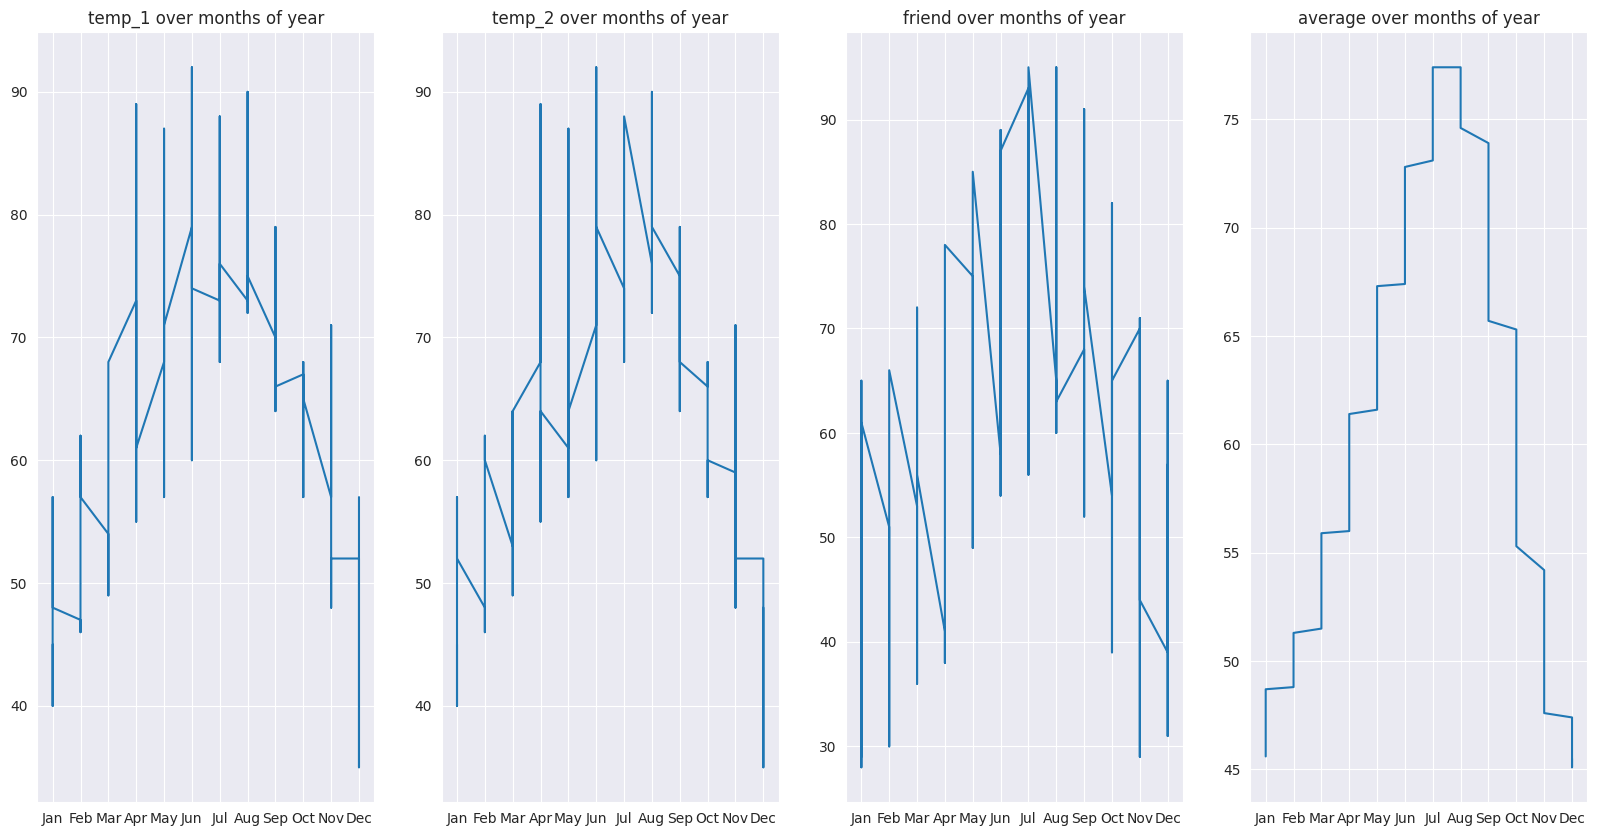

In [36]:
# creat figure with one row and four columns 
fig, (axes1,axes2,axes3,axes4)= plt.subplots(nrows=1, ncols=4, figsize=(20,10))

# line graph plot to show temp_1 over month
axes1.plot(df['month'], df['temp_1'], data=df)
# set x-axis label to month names
axes1.set_xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes1.set_title('temp_1 over months of year')

# line graph plot to show temp_2 over month
axes2.plot(df['month'], df['temp_2'], data=df)
axes2.set_xticks(ticks=range(1,13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes2.set_title('temp_2 over months of year')

# line graph plot to show friend's temperature prediction over month
axes3.plot(df['month'], df['friend'], data=df)
axes3.set_xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes3.set_title('friend over months of year')

# line graph plot to show average temperature prediction over month
axes4.plot(df['month'], df['average'], data=df)
axes4.set_xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes4.set_title('average over months of year')
plt.show()
  



### Encoding columns with object data type

In [37]:
# Initialize LabelEncoder to encode object features
encoder = LabelEncoder()

# fit encoder on 'week' feature
df['week'] = encoder.fit_transform(df['week'])

'''
'0' : Friday
'1' : Monday
'2' : Saturday
'3' : Sunday
'4' : Thursday
'5' : Tuesday
'6' : Wednesday
'''

df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,0,45,45,45.6,45,29
1,2016,1,2,2,44,45,45.7,44,61
2,2016,1,3,3,45,44,45.8,41,56
3,2016,1,4,1,44,41,45.9,40,53
4,2016,1,5,5,41,40,46.0,44,41


## Separate data into features and target

In [38]:
# extract target value and convert to array
target = np.array(df['actual'])

# drop target value from features
features = df.drop(['actual'], axis=1)

# saving features name for later use
features_columns = list(features.columns)


#convert features column to array 
features = np.array(features)

print(f'Features shape= {features.shape}')
print(f'Target value shapes= {target.shape}')

Features shape= (346, 8)
Target value shapes= (346,)


## Split data into train and test

In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=10, test_size=0.25)

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (259, 8)
x_test shape = (87, 8)


### Calculate the BaseLine Error